In [76]:
# Import packages and modules
import pandas as pd
import numpy as np 
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [79]:
df  = pd.read_csv("../Data/dataset_dk3619_preprocessed_v1.csv")

In [80]:
df

,HourUTC,HourDK,DK3619Code,hour,day_of_week,weekday_name,quarter,month,year,day_of_year,...,lag_39,lag_40,lag_41,lag_42,lag_43,lag_44,lag_45,lag_46,lag_47,lag_48
0,2012-06-01T23:00:00,2012-06-02 01:00:00,M_MA,1,5,Saturday,2,6,2012,154,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2012-06-01T23:00:00,2012-06-02 01:00:00,C_CE_CF_CD,1,5,Saturday,2,6,2012,154,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2012-06-02T00:00:00,2012-06-02 02:00:00,G_G,2,5,Saturday,2,6,2012,154,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2012-06-02T00:00:00,2012-06-02 02:00:00,Q_QA,2,5,Saturday,2,6,2012,154,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2012-06-02T00:00:00,2012-06-02 02:00:00,P_P,2,5,Saturday,2,6,2012,154,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3323742,2024-06-21T21:00:00,2024-06-21 23:00:00,E_E,23,4,Friday,2,6,2024,173,...,87.618240,82.821385,70.622805,61.690048,62.361953,65.590067,64.432311,68.518896,72.014153,75.413964
3323743,2024-06-21T21:00:00,2024-06-21 23:00:00,F_F,23,4,Friday,2,6,2024,173,...,37.126816,36.460320,29.888800,23.870010,22.132825,25.656644,25.505458,25.846402,26.237788,27.272171
3323744,2024-06-21T21:00:00,2024-06-21 23:00:00,I_I,23,4,Friday,2,6,2024,173,...,85.969801,76.281388,66.476163,57.967190,52.255899,51.656221,52.373241,54.961426,60.072132,67.941572
3323745,2024-06-21T21:00:00,2024-06-21 23:00:00,H_H,23,4,Friday,2,6,2024,173,...,151.689095,145.202948,134.877695,120.354189,105.771501,108.005934,111.028472,125.453933,132.191272,130.828517


### Choose Feauture will use for Model

In [83]:
columns = ['HourUTC', 'HourDK', 'hour', 'day_of_week',
              'weekday_name', 'quarter', 'month', 'year', 'day_of_year',
              'day_of_month', 'week_of_year', 'season', 'holiday', 'Consumption_MWh']

df_filter = df[df['DK3619Code'] == 'M_MA']

df_corr = df_filter[columns]
#df_corr = pd.get_dummies(df_corr, columns=['DK3619Code'], prefix=['DK3619Code'])


In [84]:
df_corr.columns

Index(['HourUTC', 'HourDK', 'hour', 'day_of_week', 'weekday_name', 'quarter',
       'month', 'year', 'day_of_year', 'day_of_month', 'week_of_year',
       'season', 'holiday', 'Consumption_MWh'],
      dtype='object')

In [85]:
### Mapping data to numberic 

weekday_mapping = {
    'Monday': 0,
    'Tuesday': 1,
    'Wednesday': 2,
    'Thursday': 3,
    'Friday': 4,
    'Saturday': 5,
    'Sunday': 6
}

df_corr['weekday_name'] = df_corr['weekday_name'].map(weekday_mapping)


C:\Users\danny.ha\AppData\Local\Temp\ipykernel_15040\3445385018.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr['weekday_name'] = df_corr['weekday_name'].map(weekday_mapping)


In [86]:
### Season mapping 

seasons_mapping = {
    'Spring': 0,
    'Summer': 1,
    'Autumn': 2,
    'Winter': 3
}

df_corr['season'] = df_corr['season'].map(seasons_mapping)

C:\Users\danny.ha\AppData\Local\Temp\ipykernel_15040\3343511339.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr['season'] = df_corr['season'].map(seasons_mapping)


In [89]:
df_corr['HourUTC'] = pd.to_datetime(df_corr['HourUTC'])
df_corr['HourDK'] = pd.to_datetime(df_corr['HourDK'])

df_corr = df_corr.drop(['HourUTC', 'HourDK'], axis=1)
correlation_matrix = df_corr.corr()

print(correlation_matrix)

                     hour  day_of_week  weekday_name   quarter     month  \
hour             1.000000     0.000016      0.000016 -0.000426 -0.000319   
day_of_week      0.000016     1.000000      1.000000  0.000564  0.001602   
weekday_name     0.000016     1.000000      1.000000  0.000564  0.001602   
quarter         -0.000426     0.000564      0.000564  1.000000  0.971198   
month           -0.000319     0.001602      0.001602  0.971198  1.000000   
year             0.000018    -0.000519     -0.000519 -0.120961 -0.121763   
day_of_year     -0.000321     0.001509      0.001509  0.968086  0.996492   
day_of_month    -0.000017    -0.000962     -0.000962  0.013639  0.011161   
week_of_year    -0.000321     0.000235      0.000235  0.947889  0.972474   
season          -0.000286     0.000106      0.000106  0.213887  0.206307   
holiday          0.000227     0.009781      0.009781 -0.050583 -0.052024   
Consumption_MWh  0.061940    -0.279271     -0.279271 -0.128351 -0.117870   

           

C:\Users\danny.ha\AppData\Local\Temp\ipykernel_15040\4229419573.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr['HourUTC'] = pd.to_datetime(df_corr['HourUTC'])
C:\Users\danny.ha\AppData\Local\Temp\ipykernel_15040\4229419573.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr['HourDK'] = pd.to_datetime(df_corr['HourDK'])


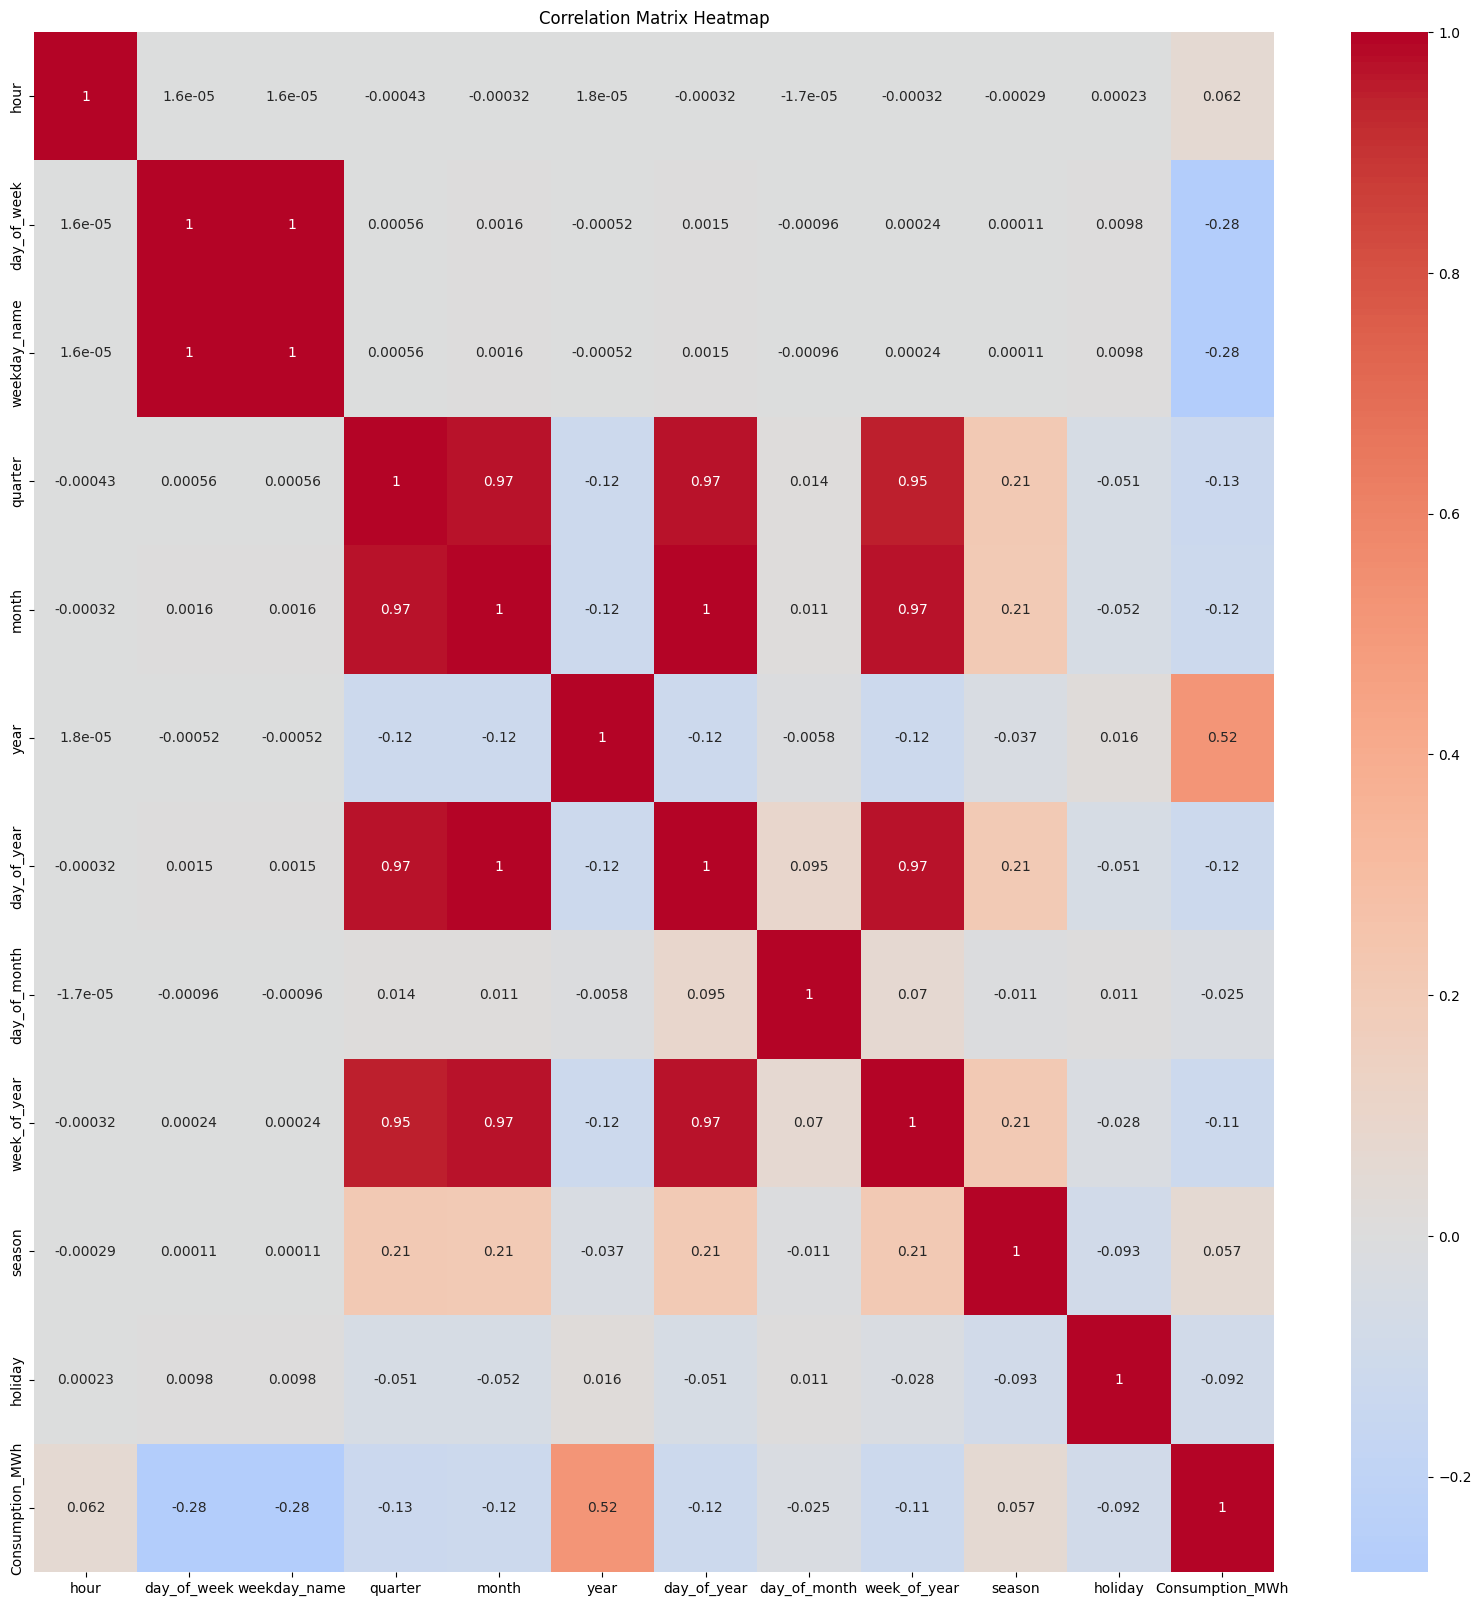

In [90]:
# Plot the heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix Heatmap')
plt.show()

### Split data

In [91]:
#Split data
y = df_corr[['Consumption_MWh']]  # Target variable
x = df_corr[['season', 'year', 'month', 'hour']]  # Features



# Split the data into training (60%), validation (20%), and test (20%) sets
x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size=0.4, random_state=42)

# Further split the temporary data into validation (50%) and test (50%) sets
x_valid, x_test, y_valid, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42)

### Train data

In [101]:
rf_model = RandomForestRegressor(n_estimators=1000, random_state=10)
rf_model.fit(x_train, y_train)

C:\Users\danny.ha\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor(n_estimators=1000, random_state=10)

## Predict

In [102]:
y_pred = rf_model.predict(x_test)

In [103]:
y_pred

array([33.29850132, 26.4185654 , 27.25571913, ..., 27.23354058,
       29.73463345, 27.45614659])

In [104]:
# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R-squared (R²): {r2}')

Mean Absolute Error (MAE): 4.159015436319128
Mean Squared Error (MSE): 33.33080809685664
Root Mean Squared Error (RMSE): 5.7732839958602975
R-squared (R²): 0.6726635354395449
